## Group No 48

## Group Member Names:
1. Suvojit Hore (2022aa05098)
2. Gayathri Nadella (2022aa05288)
3. Thakur Govind Ishwardayal (2022aa05094)

# 1. Import the required libraries

In [1]:
# Imports
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from keras import regularizers
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# 2. Data Acquisition  -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL (Flower Photos)



In [2]:
# Downloading and extracting the data - Flower Photos
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 [==============================] - 8s 0us/step


In [3]:
# Total Image count
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [4]:
# List of flower directories
flower_dirs = os.listdir(data_dir)
flower_dirs.remove('LICENSE.txt')
flower_dirs

['tulips', 'daisy', 'dandelion', 'roses', 'sunflowers']

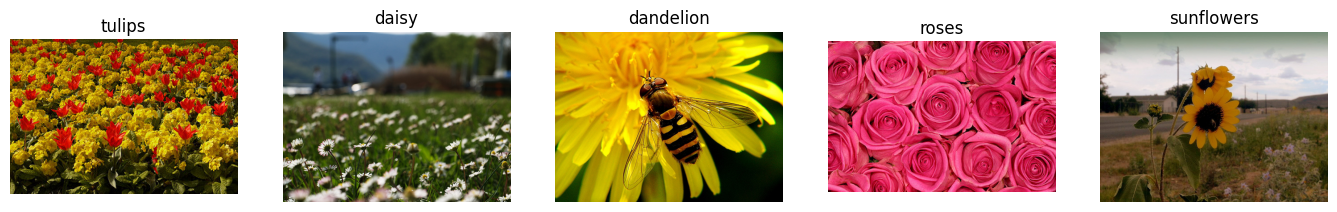

In [5]:
# Visualize one image from each class
plt.figure(figsize=(17, 10))
for dir in flower_dirs:
    ax = plt.subplot(1, 5, flower_dirs.index(dir) + 1)
    plt.imshow(PIL.Image.open(str(data_dir) + '/' + dir + '/' +  os.listdir(str(data_dir) + '/' + dir)[0]))
    plt.title(dir)
    plt.axis("off")

<ipython-input-6-a690b9599623>:14: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


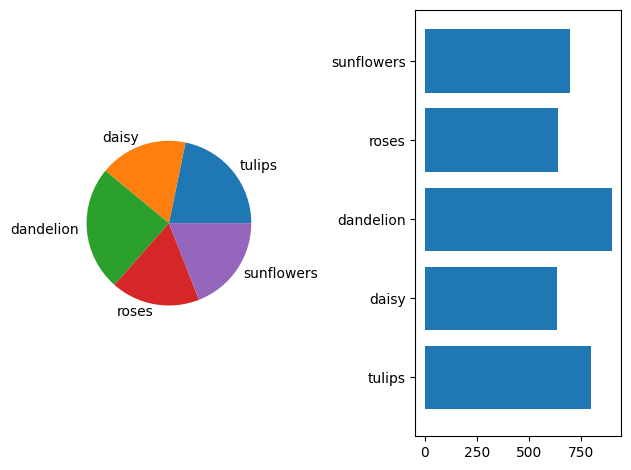

In [6]:
# distribution of the categories of the target / label
class_dis = [len(os.listdir(str(data_dir) + '/' + name)) for name in flower_dirs]


# Visualization as a pie chart - class distribution
fig, ax = plt.subplots(1, 2, constrained_layout=True)
ax[0].pie(class_dis, labels=flower_dirs, pctdistance=0.85)
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

# Visualization as a bar chart - class distribution
ax[1].barh(flower_dirs, class_dis)
fig.tight_layout()
plt.rcParams["figure.figsize"] = (12, 4)
plt.show()

## 2.1 Write your observations from the above.

1. Size of the dataset - **3670**
2. What type of data attributes are there? - **flower images in jpg format**
3. What are you classifying? - **dandelion, sunflowers, tulips, daisy, roses**
4. Plot the distribution of the categories of the target / label. - **plotted above**



# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Split the data into training set and testing set

In [7]:
#image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Train Data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
             data_dir,
             subset='training',
             validation_split=0.2,
             image_size=IMAGE_SIZE,
             batch_size=BATCH_SIZE,
             seed=42)

# Test data
test_data = tf.keras.preprocessing.image_dataset_from_directory(
            data_dir,
            subset='validation',
            validation_split=0.2,
            image_size=IMAGE_SIZE,
            batch_size=BATCH_SIZE,
             seed=42)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [8]:
#target variables - flower type names
class_names = train_data.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

## 3.3 Apply pre-processing techiniques

In [9]:
#Encode class names
label_encode = LabelEncoder()
class_names_label_encode = label_encode.fit_transform(class_names)
class_names_label_encode

array([0, 1, 2, 3, 4])

In [10]:
#Resize the images
def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_SIZE[0], IMAGE_SIZE[0]))
    return image, label

In [11]:
# Resize image pixel values to range of 0 to 1
def preprocess_image(image, label, image_shape=224):

    img = tf.image.resize(image, [image_shape, image_shape])
    img = img/225.

    return tf.cast(img, tf.float32), label

In [12]:
# map the preprocess_image to train_data and resize images
train_data = train_data.map(format_image).map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# shuffle the data
train_data = train_data.shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# map the preprocess_image to test_data
test_data = test_data.map(format_image).map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# shuffle the data
test_data = test_data.shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used

* to resize the images
* to encode categorical data
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


- encoded categorical data - flower name labels using labelencoder
- resized all images to 224 x 224
- normalization - reduced the range of pixel values from 0-255 to 0-1


In [14]:
# Dataset size
approx_train_size = len(train_data) * BATCH_SIZE
approx_test_size = len(test_data) * BATCH_SIZE
approx_train_size, approx_test_size

(2944, 736)

- Exact data set size -  Tabulated above in train test split (2936, 734)

# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [19]:
# sent seed value to fix randomness
tf.random.set_seed(42)

# #building the model layer by layer
model = tf.keras.models.Sequential([
    # Input Layer
    tf.keras.layers.InputLayer(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[0],3,)),
    #Flatten into 1 dimension
    tf.keras.layers.Flatten(),
    # First dense layer
    tf.keras.layers.Dense(128, activation='relu'),
     # Dropout to reduce overfitting
    tf.keras.layers.Dropout(0.3),
    # Batch normalization
    tf.keras.layers.BatchNormalization(),
    # Second dense layer
    tf.keras.layers.Dense(64, activation='relu'),
    # Dropout to reduce overfitting
    tf.keras.layers.Dropout(0.3),
    # Batch normalization
    tf.keras.layers.BatchNormalization(),
    # Third dense layer
    tf.keras.layers.Dense(32, activation='relu'),
    # Dropout to reduce overfitting
    tf.keras.layers.Dropout(0.3),
    #Batch Normalization
    tf.keras.layers.BatchNormalization(),
    # Fourth dense layer
    tf.keras.layers.Dense(16, activation='relu'),
    # Dropout to reduce overfitting
    tf.keras.layers.Dropout(0.3),
    # Batch Normalization
    tf.keras.layers.BatchNormalization(),
    # Final dense layer for classifying 5 categories of flowers
    tf.keras.layers.Dense(5, activation='softmax')])

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



In [20]:
#model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 128)               19267712  
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                      

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with sparse categorical CE loss and metric accuracy.

In [21]:
# Compiling the model with appropriate optimizer and loss function
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer='adam',
               metrics=['accuracy'])


## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [ ]:
##---------Type the code below this line------------------##
history = model.fit(train_data, epochs=20)

Epoch 1/20
92/92 [==============================] - 41s 355ms/step - loss: 1.9476 - accuracy: 0.2238
Epoch 2/20
92/92 [==============================] - 42s 372ms/step - loss: 1.7856 - accuracy: 0.2357
Epoch 3/20
92/92 [==============================] - 39s 349ms/step - loss: 1.6695 - accuracy: 0.2660
Epoch 4/20
92/92 [==============================] - 41s 375ms/step - loss: 1.5941 - accuracy: 0.2861
Epoch 5/20
92/92 [==============================] - 39s 353ms/step - loss: 1.5644 - accuracy: 0.2905
Epoch 6/20
92/92 [==============================] - 40s 373ms/step - loss: 1.5159 - accuracy: 0.3140
Epoch 7/20
92/92 [==============================] - 39s 349ms/step - loss: 1.4653 - accuracy: 0.3569
Epoch 8/20
92/92 [==============================] - 39s 347ms/step - loss: 1.4420 - accuracy: 0.3631
Epoch 9/20
92/92 [==============================] - 39s 343ms/step - loss: 1.4254 - accuracy: 0.3743
Epoch 10/20
92/92 [==============================] - 39s 345ms/step - loss: 1.4242 - accura

In [ ]:
#training accuracy
print('Final training accuracy ', history.history['accuracy'][-1])

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


**Optimizer used** **-** Adam .
**Justification:** to prevent getting stuck in local optima an to have better accuracy and speed of model training.

**Regularization used** **:** Dropout and Batch Normalization.
**Justification:** Dropout to reduce overfitting of the model on training data, Batch normalization to make training of artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling.

**Hyperparamaters Tuned:** Fropout value, Number of layers, number of neurons in each layer to achieve better accuracy

# 6. Test the model - 0.5 marks


In [ ]:
testLoss, testAccuracy = model.evaluate(test_data)
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

In [ ]:
#make the prediction
predictions = model.predict(test_data)
score = tf.nn.softmax(predictions[99])

# print the result
print("This image most likely belongs to {} with a {:.2f} percent confidence. \n".format(class_names[np.argmax(score)], 100 * np.max(score)))

23/23 [==============================] - 2s 24ms/step
This image most likely belongs to tulips with a 28.24 percent confidence. 



In [ ]:
tf.keras.utils.to_categorical(predictions, 5)

array([[[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       ...,

       [[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]]], dtype=float32)

# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Show Confusion Matrix for testing dataset.
4. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


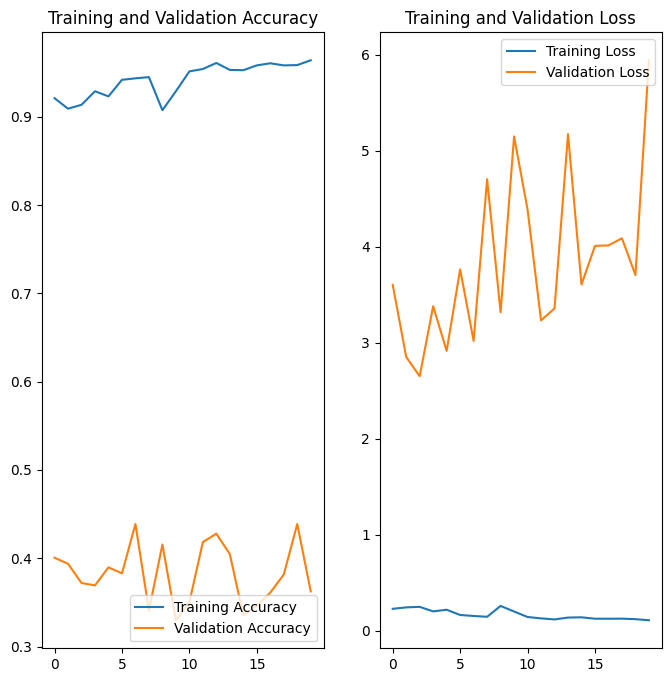

In [ ]:
# Training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

#plot the curves
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#plot the curves
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [ ]:
##---------Type the code below this line------------------##

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [ ]:
##---------Type the code below this line------------------##

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [ ]:
##---------Type the code below this line------------------##

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [ ]:
##---------Type the code below this line------------------##

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck